# Práctica 4


date: 10/10/2023  
File: practica_4_ej_3.ipynb  
Author : Pablo Naim Chehade   
Email: pablo.chehade.villalba@gmail.com  
GitHub: https://github.com/Lupama2  


## Ejercicio 3

In [1]:
#Import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Fijo seed for reproducibility 
seed=2
np.random.seed(seed)
tf.random.set_seed(seed)


In [3]:
# Data Input

def mapeo_logistico(x):
    return 4*x*(1-x)

N_train = 100
N_test = 100

x_train = np.random.rand(N_train)
x_test = np.random.rand(N_test)

y_train = mapeo_logistico(x_train)
y_test = mapeo_logistico(x_test)

In [4]:
#Def red

def output_activation(x):
    return 1/(1 + tf.math.exp(-x))

def RN(x_train, y_train, x_test, y_test, N_epochs = 500):

    # Network architecture
    hidden_dim=5 # Number of hidden units
    inputs = tf.keras.layers.Input(shape=(1,))
    x = tf.keras.layers.Dense(hidden_dim, activation=output_activation)(inputs)
    merge=tf.keras.layers.concatenate([inputs,x],axis=-1)
    predictions = tf.keras.layers.Dense(1)(merge) #si no se declara activation, se usa activation lineal

    # # accuracy compatible with tensorflow v1
    # from tensorflow.python.keras import backend as K
    # def v1_accuracy(y_true, y_pred):
    #      return K.mean(K.equal(y_true, K.round(y_pred)), axis=-1)

    # Model 
    opti=tf.keras.optimizers.Adam(lr=0.01, decay=0.0)
    model = tf.keras.Model(inputs=inputs, outputs=predictions)
    model.compile(optimizer=opti,
                loss='MSE') #, metrics=[v1_accuracy]

    history=model.fit(x=x_train, y=y_train,
                    epochs=N_epochs,
                    batch_size=5,
                    shuffle=False,
                    validation_data=(x_test, y_test), verbose=True)


    # tf.keras.utils.plot_model(model, to_file='model-ej3.png', show_shapes=False, show_layer_names=True, rankdir='TB')
    # print(model.summary())
    # encoded_log = model.predict(x_test, verbose=True)
    # print(encoded_log.shape)

    # e_loss = np.sqrt(history.history['loss'])
    # e_validation = np.sqrt(history.history['val_loss'])

    e_loss = history.history['loss']
    e_validation = history.history['val_loss']


    return e_loss, e_validation

#ej
# e_loss, e_validation = RN(x_train, y_train, x_test, y_test, 500)

In [5]:
#Varío la cantidad de datos de train

N_train_vec = [5, 10, 100] #[5,10,20,40,60,80,100]
N_epochs = 500
e_loss_matrix = np.empty([len(N_train_vec), N_epochs])
e_validation_matrix = np.empty([len(N_train_vec), N_epochs])

for i, N_train in enumerate(N_train_vec):
    e_loss_matrix[i], e_validation_matrix[i] = RN(x_train[:N_train], y_train[:N_train], x_test, y_test, N_epochs)




c:\Users\lupam\.conda\envs\RedesNeuronales2023\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 2.9452 - val_loss: 2.3189
Epoch 2/500
1/1 [==============================] - 0s 47ms/step - loss: 2.7843 - val_loss: 2.1739
Epoch 3/500
1/1 [==============================] - 0s 31ms/step - loss: 2.6288 - val_loss: 2.0347
Epoch 4/500
1/1 [==============================] - 0s 51ms/step - loss: 2.4788 - val_loss: 1.9012
Epoch 5/500
1/1 [==============================] - 0s 43ms/step - loss: 2.3342 - val_loss: 1.7734
Epoch 6/500
1/1 [==============================] - 0s 54ms/step - loss: 2.1951 - val_loss: 1.6512
Epoch 7/500
1/1 [==============================] - 0s 27ms/step - loss: 2.0615 - val_loss: 1.5348
Epoch 8/500
1/1 [==============================] - 0s 31ms/step - loss: 1.9333 - val_loss: 1.4239
Epoch 9/500
1/1 [==============================] - 0s 47ms/step - loss: 1.8106 - val_loss: 1.3186
Epoch 10/500
1/1 [==============================] - 0s 31ms/step - loss: 1.6932 - val_loss: 1.2187
Epoch 11/500
1/1 [===

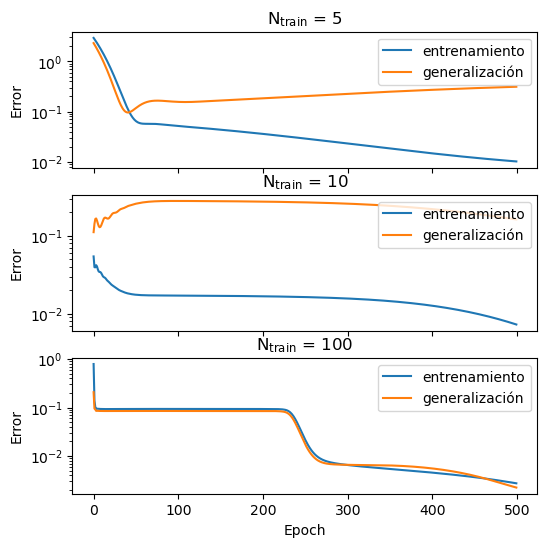

In [6]:
#Graph

fig, ax = plt.subplots(len(N_train_vec), 1, figsize = (6,6), sharex = True)
fig.subplots_adjust(hspace=0.2)

for i in range(len(N_train_vec)):
    ax[i].plot(e_loss_matrix[i], label='entrenamiento')
    ax[i].plot(e_validation_matrix[i], label='generalización')
    ax[i].set_title("$\mathrm{N_{train}}$ = " + str(N_train_vec[i]))
    # ax[i].set_ylim([0,1.3])
    ax[i].legend(loc = 'upper right')
    ax[i].set_ylabel('Error')
    ax[i].set_yscale("log")

ax[2].set_xlabel('Epoch')


plt.show()

#Guardo figura
fig.savefig('Informe/ej3_vs_epochs.png', bbox_inches='tight')

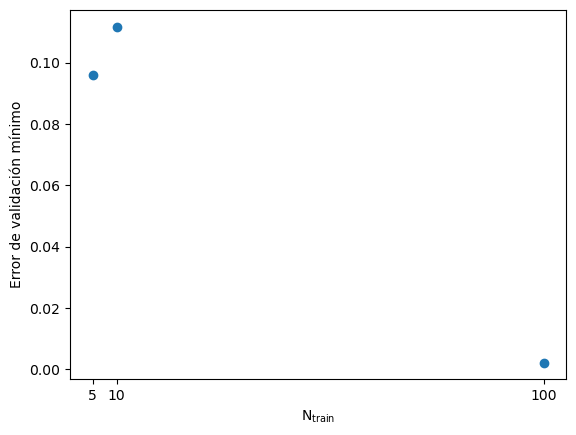

In [7]:
#Grafico el valor mínimo alcanzado para cada e_validation en función de N_train
e_validation_min = np.min(e_validation_matrix, axis=1)

fig, ax = plt.subplots(1, 1)
ax.plot(N_train_vec, e_validation_min, 'o')
ax.set_xlabel("$\mathrm{N_{train}}$")
ax.set_ylabel('Error de validación mínimo')
#Pido que los ticks labels sean N_train_array
ax.set_xticks(N_train_vec)
plt.show()

#Guardo figura
fig.savefig('ej3_vs_Ntrain.png', bbox_inches='tight')
